In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

%matplotlib inline

In [14]:
#Importing the dataset
csvfile = "C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe/92dataNS.csv"
df = pd.read_csv(csvfile)

df.head(3)

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,...,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,pca1,pca2,cluster
0,강원도,강릉시,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,...,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,-0.850741,1.259255,4
1,강원도,고성군,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,...,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,-1.490733,0.283758,2
2,강원도,동해시,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,...,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,-0.822217,-0.225585,2


In [16]:
# 기존 데이터 셋에서 시작하므로 분석 방해되는 항목 제거
DF = df.iloc[:,2:-3]
DF

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
DF.data = DF.values
DF.data

C:\Users\sylee\AppData\Local\Temp\ipykernel_9124\2305901499.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  DF.data = DF.values


array([[0.67065868, 0.64901961, 0.21080057, ..., 0.34848523, 0.05376901,
        0.53734062],
       [0.4491018 , 0.39803922, 0.06371388, ..., 0.38186082, 0.05754938,
        0.18639951],
       [0.38123752, 0.11764706, 0.04334439, ..., 0.23858537, 0.02703626,
        0.42562234],
       ...,
       [0.16766467, 0.5245098 , 0.31738513, ..., 0.45181899, 0.45097672,
        0.81360049],
       [0.53692615, 0.16470588, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.80838323, 0.62254902, 0.24396021, ..., 0.36907086, 0.31253228,
        0.87128112]])

In [18]:
DF['cluster']=df['cluster']
DF

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,cluster
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,4
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,2
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,2
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440,2
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557,7
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239,8
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600,1
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [19]:
from sklearn.mixture import GaussianMixture
#GMM의 가장 중요한 초기화 파라미터는 n_components, gaussian mixture 모델의 총 개수,
#K-means 의 n_clusters 와 같이 군집의 개수를 정하는 데 중요한 역할을 수행
gmm = GaussianMixture(n_components = 9, random_state = 0).fit(DF.data)
gmm_cluster_labels = gmm.predict(DF.data)

##군집화 결과를 DF의  'gmm_cluster' 칼럼명으로 지정
DF['gmm_cluster'] = gmm_cluster_labels

#cluster 값에 따라 gmm_cluster 값이 어떻게 매핑 되었는지 확인
df_result = DF.groupby(['cluster'])['gmm_cluster'].value_counts()
print(df_result)

cluster  gmm_cluster
0        8               5
         5               1
1        7               3
         1               2
         5               1
2        6              14
         4               1
3        1              23
         7               8
4        5               3
5        0               8
6        2               2
7        7               9
         3               6
         1               1
8        3               5
Name: gmm_cluster, dtype: int64


C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
kmeans = KMeans(n_clusters = 9, init='k-means++', max_iter = 300, random_state=0).fit(DF.data)
kmeans_cluster_labels = kmeans.predict(DF.data)
DF['kmeans_cluster'] = kmeans_cluster_labels
# cluster -> 기존 kmeans 라벨링 결과 값
df_result = DF.groupby(['cluster'])['kmeans_cluster'].value_counts()
print(df_result)

cluster  kmeans_cluster
0        0                  6
1        1                  6
2        2                 15
3        3                 31
4        4                  3
5        5                  8
6        6                  2
7        7                 16
8        8                  5
Name: kmeans_cluster, dtype: int64


C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
DF

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수,cluster,gmm_cluster,kmeans_cluster
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341,4,5,4
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400,2,6,2
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622,2,6,2
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440,2,4,2
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557,7,7,7
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239,8,3,8
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600,1,7,1
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000,6,2,6


In [27]:
DF['pca1']=df['pca1']
DF['pca2']=df['pca2']

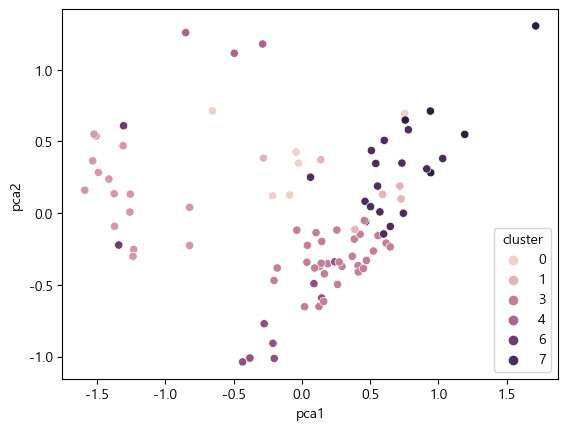

<Figure size 1500x1200 with 0 Axes>

In [28]:
sns.scatterplot(x = DF['pca1'], y=DF['pca2'], hue=DF['cluster'])
plt.figure(figsize=(15,12))
plt.show()

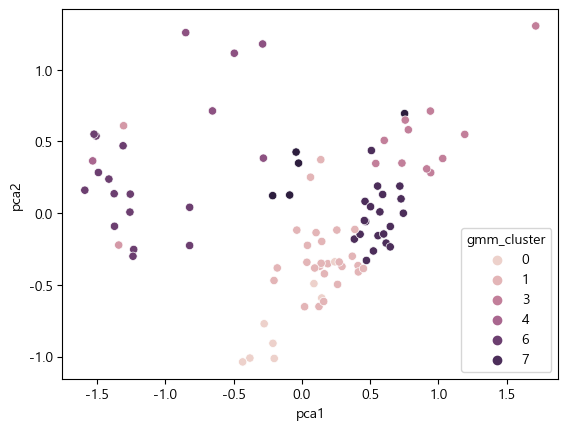

<Figure size 1500x1200 with 0 Axes>

In [29]:
sns.scatterplot(x = DF['pca1'], y=DF['pca2'], hue=DF['gmm_cluster'])
plt.figure(figsize=(15,12))
plt.show()

In [30]:
#DF.to_csv('gmm_testdata.csv', index = False)